In [38]:
#Importing Libraries
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Akkju\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Jun 14 07:58:30 2025).


In [39]:
#Cleaning Data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #datetime format

df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x) #String to list

In [40]:
#Filtering for country and removing NAN values

df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])

In [41]:
job_titles= df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles.sort()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [49]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [52]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index #Sorting

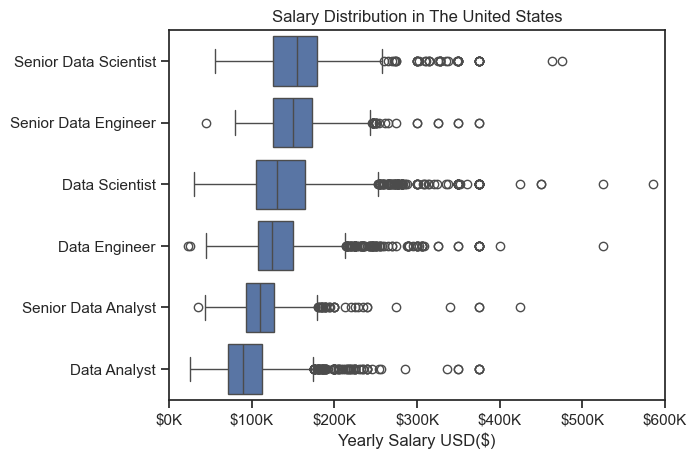

In [55]:
sns.boxplot(data=df_US_top6, x='salary_year_avg',y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in The United States')
plt.ylabel('')
plt.xlabel('Yearly Salary USD($)')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate Median Salary Vs Skill for Data Analysts